In [10]:
# Importing the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,learning_curve,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve, accuracy_score, classification_report



In [11]:
# Reading the pre-processed Dataset
adult_dataset = pd.read_csv('pre_processed_dataset.csv')

adult_dataset.head()

,age,education-num,marital-status,relationship,sex,capital-gain,capital-loss,hours-per_week,income-per-year
0,39,13,4,1,1,2174,0,40,0
1,50,13,2,0,1,0,0,13,0
2,38,9,0,1,1,0,0,40,0
3,53,7,2,0,1,0,0,40,0
4,28,13,2,5,0,0,0,40,0


## Training the Random Forest Classification Model

In [12]:
# Split the data into features (X) and target variable (y)
y = adult_dataset['income-per-year']

X = adult_dataset.drop(['income-per-year'],axis=1)  

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Initialize the RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Predict on the training set
y_train_pred = rf_classifier.predict(X_train)

# Predict on the test set
y_test_pred = rf_classifier.predict(X_test)

# Evaluate the classifier for training set
train_accuracy = accuracy_score(y_train, y_train_pred)
train_class_report = classification_report(y_train, y_train_pred)

# Evaluate the classifier for testing set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_class_report = classification_report(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("\nTraining Classification Report:\n", train_class_report)

print("\nTesting Accuracy:", test_accuracy)
print("\nTesting Classification Report:\n", test_class_report)


Training Accuracy: 0.9151372237058923

Training Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.96      0.94     26114
           1       0.88      0.78      0.83      9084

    accuracy                           0.92     35198
   macro avg       0.90      0.87      0.88     35198
weighted avg       0.91      0.92      0.91     35198


Testing Accuracy: 0.8403409090909091

Testing Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.92      0.90      6577
           1       0.71      0.62      0.66      2223

    accuracy                           0.84      8800
   macro avg       0.79      0.77      0.78      8800
weighted avg       0.83      0.84      0.84      8800



### Evaluation Methods

#### Confusion Matrix

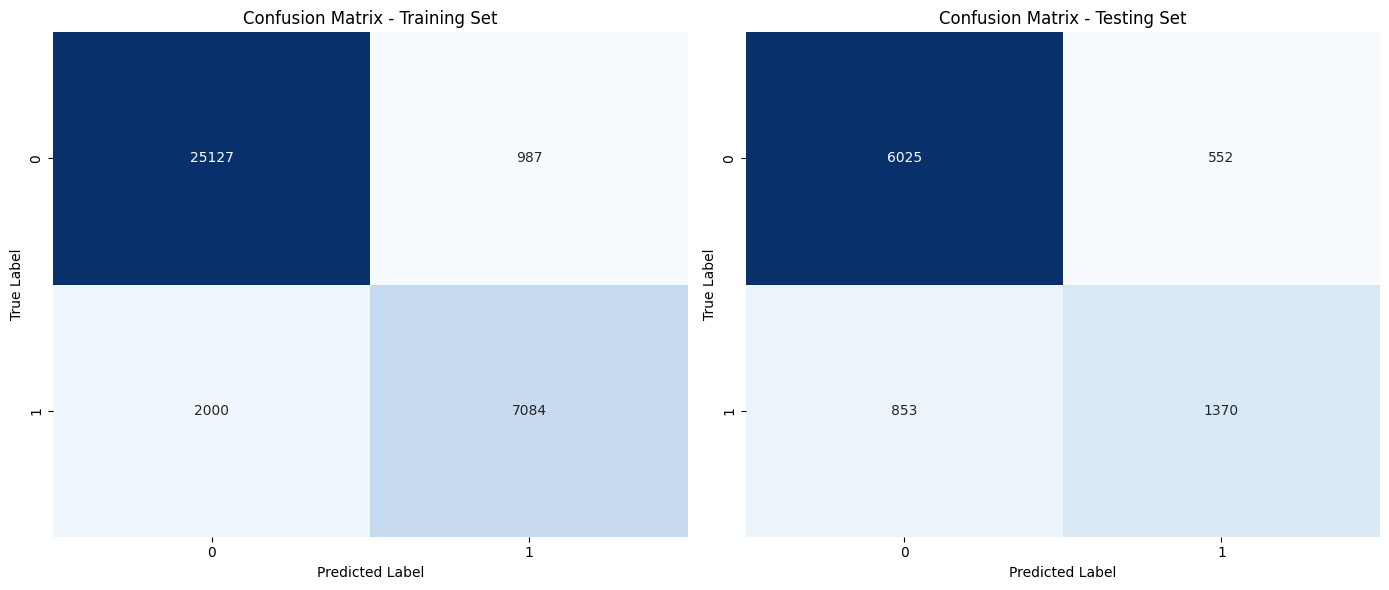

In [14]:
# Confusion Matrix for training set
train_conf_matrix = confusion_matrix(y_train, y_train_pred)
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.heatmap(train_conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - Training Set")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

# Confusion Matrix for testing set
test_conf_matrix = confusion_matrix(y_test, y_test_pred)
plt.subplot(1, 2, 2)
sns.heatmap(test_conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - Testing Set")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

plt.tight_layout()
plt.show()

#### Precision and Recall Curve

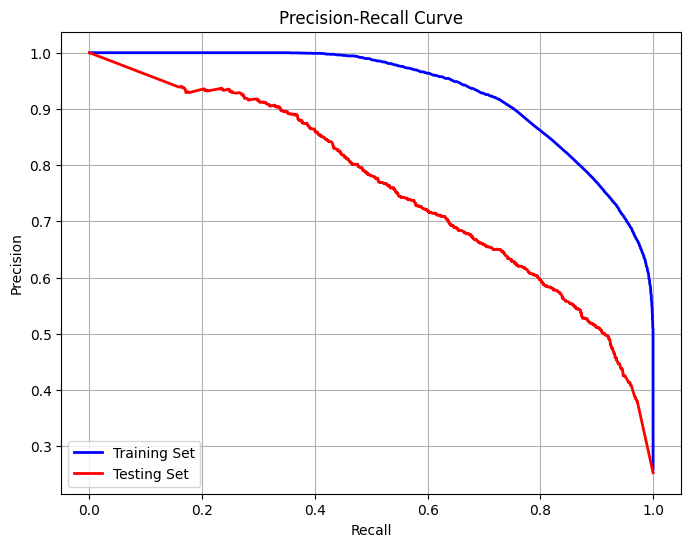

In [15]:
# Get predicted probabilities for the positive class (class 1) on training set
y_train_probs = rf_classifier.predict_proba(X_train)[:, 1]
# Get predicted probabilities for the positive class (class 1) on testing set
y_test_probs = rf_classifier.predict_proba(X_test)[:, 1]

# Calculate precision and recall for training set
precision_train, recall_train, _ = precision_recall_curve(y_train, y_train_probs)
# Calculate precision and recall for testing set
precision_test, recall_test, _ = precision_recall_curve(y_test, y_test_probs)

# Plot Precision-Recall Curves
plt.figure(figsize=(8, 6))
plt.plot(recall_train, precision_train, color='b', lw=2, label='Training Set')
plt.plot(recall_test, precision_test, color='r', lw=2, label='Testing Set')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

#### Learning Curve

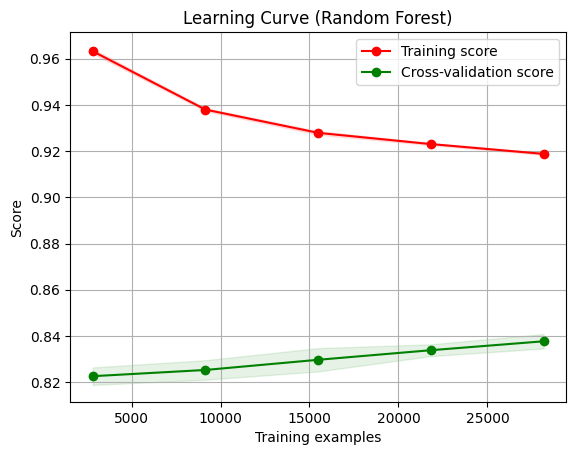

In [16]:
# Define a function to plot the learning curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Initialize the RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)



#### ROC Curve and AUC Score

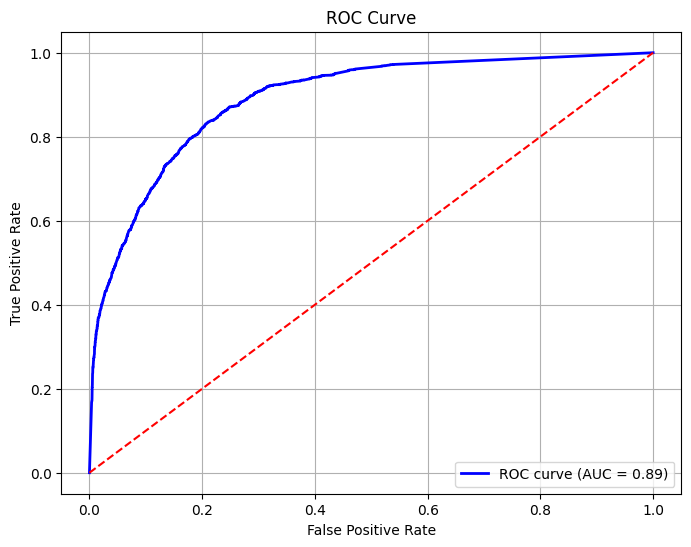

AUC Score: 0.8901412253924599


In [42]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_test_probs)

# Calculate AUC score
auc_score = roc_auc_score(y_test, y_test_probs)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], color='r', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

print("AUC Score:", auc_score)



This is Evaluations are before the Model Optimization Let's Optimize the Model and See the Differences it makes

#### Hyperparameter Tuning of the RandomForest Classification

In [18]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters grid
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4]  # Minimum samples required at each leaf node
}

# Initialize the RandomForestClassifier
clf = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy')

# Perform Grid Search to find the best parameters
grid_search.fit(X_train, y_train)

# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Train the best estimator
best_estimator.fit(X_train, y_train)

# Predict on the test set using the best estimator
y_pred_test_tuned = best_estimator.predict(X_test)

# Evaluate the best estimator on the testing set
test_accuracy_tuned = accuracy_score(y_test, y_pred_test_tuned)

print("Best Parameters:", best_params)
print("Best Training Accuracy after Tuning:", best_estimator.score(X_train, y_train))
print("Testing Accuracy after Tuning:", test_accuracy_tuned)


Best Parameters: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Best Training Accuracy after Tuning: 0.8762997897607818
Testing Accuracy after Tuning: 0.8579545454545454


### Metrics After Model Optimization

#### Classification Report

In [19]:
# Predict on the training set using the tuned model
y_pred_train_tuned = best_estimator.predict(X_train)

# Generate classification report for training set
train_class_report_tuned = classification_report(y_train, y_pred_train_tuned)

print("Classification Report for Training Set:\n", train_class_report_tuned)

# Predict on the testing set using the tuned model
y_pred_test_tuned = best_estimator.predict(X_test)

# Generate classification report for testing set
test_class_report_tuned = classification_report(y_test, y_pred_test_tuned)

print("\nClassification Report for Testing Set:\n", test_class_report_tuned)

Classification Report for Training Set:
               precision    recall  f1-score   support

           0       0.89      0.96      0.92     26114
           1       0.84      0.65      0.73      9084

    accuracy                           0.88     35198
   macro avg       0.86      0.80      0.82     35198
weighted avg       0.87      0.88      0.87     35198


Classification Report for Testing Set:
               precision    recall  f1-score   support

           0       0.87      0.94      0.91      6577
           1       0.79      0.60      0.68      2223

    accuracy                           0.86      8800
   macro avg       0.83      0.77      0.79      8800
weighted avg       0.85      0.86      0.85      8800



#### Confusion Matrix

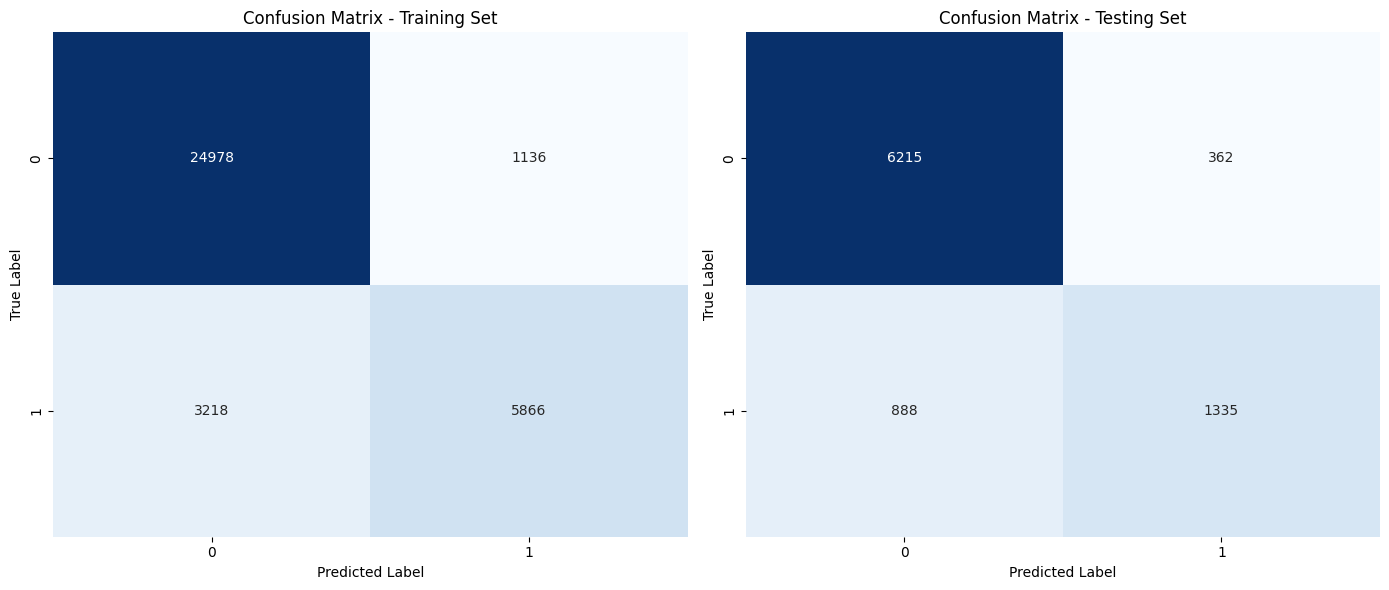

In [20]:
# Generate confusion matrix for training set
train_conf_matrix_tuned = confusion_matrix(y_train, y_pred_train_tuned)

# Generate confusion matrix for testing set
test_conf_matrix_tuned = confusion_matrix(y_test, y_pred_test_tuned)
                                          
# Plot confusion matrices side by side
plt.figure(figsize=(14, 6))

# Plot confusion matrix for training set
plt.subplot(1, 2, 1)
sns.heatmap(train_conf_matrix_tuned, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - Training Set")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

# Plot confusion matrix for testing set
plt.subplot(1, 2, 2)
sns.heatmap(test_conf_matrix_tuned, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - Testing Set")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

plt.tight_layout()
plt.show()

#### Precision and Recall Curve

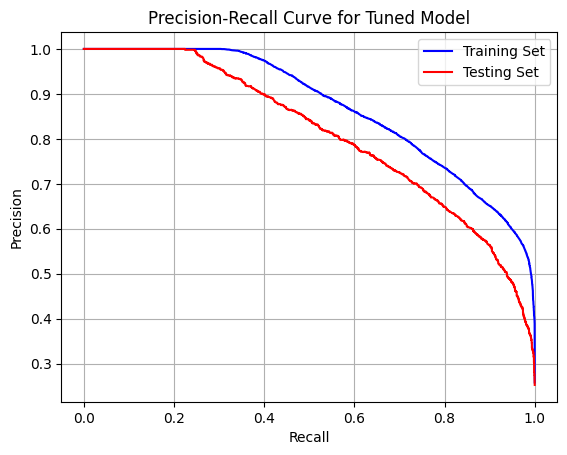

In [21]:
# Predict probabilities on the training set using the tuned model
y_train_probs_tuned = best_estimator.predict_proba(X_train)[:, 1]

# Predict probabilities on the testing set using the tuned model
y_test_probs_tuned = best_estimator.predict_proba(X_test)[:, 1]

# Compute precision-recall curve for training set
train_precision, train_recall, _ = precision_recall_curve(y_train, y_train_probs_tuned)

# Compute precision-recall curve for testing set
test_precision, test_recall, _ = precision_recall_curve(y_test, y_test_probs_tuned)

# Plot precision-recall curve for training set
plt.plot(train_recall, train_precision, label='Training Set', color='b')
# Plot precision-recall curve for testing set
plt.plot(test_recall, test_precision, label='Testing Set', color='r')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Tuned Model')
plt.legend()
plt.grid(True)
plt.show()

#### Learning Curve

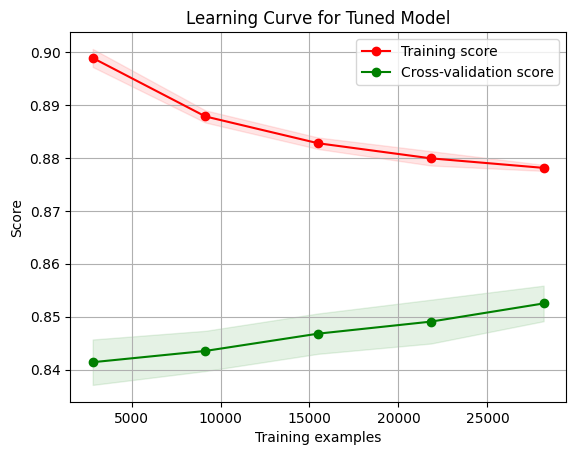

In [22]:
# Define a function to plot the learning curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Plot learning curve for the tuned model
title = "Learning Curve for Tuned Model"
plot_learning_curve(best_estimator, title, X_train, y_train, cv=5, n_jobs=-1)
plt.show()


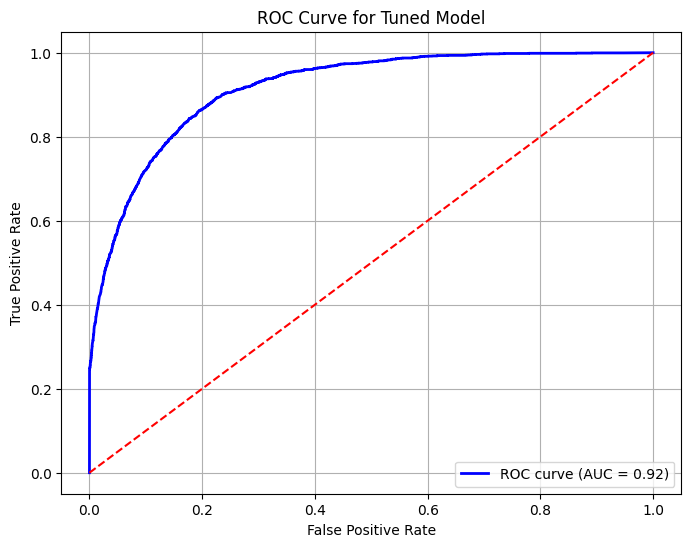

AUC Score: 0.9152454425655293


In [23]:
# Predict probabilities on the testing set using the tuned model
y_test_probs_tuned = best_estimator.predict_proba(X_test)[:, 1]

# Compute false positive rate (fpr), true positive rate (tpr), and thresholds for ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_test_probs_tuned)

# Calculate AUC score
roc_auc = roc_auc_score(y_test, y_test_probs_tuned)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='r', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Tuned Model')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

print("AUC Score:", roc_auc)

### Evaluation Comparison in Random Forest Classification

#### Classification Report Comparison

In [24]:
# Before Optimization
print("Training Accuracy:", train_accuracy)
print("\n (Before Optimization) Training Classification Report:\n", train_class_report)

print("\nTesting Accuracy:", test_accuracy)
print("\n (Before Optimization) Testing Classification Report:\n", test_class_report)

Training Accuracy: 0.9151372237058923

 (Before Optimization) Training Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.96      0.94     26114
           1       0.88      0.78      0.83      9084

    accuracy                           0.92     35198
   macro avg       0.90      0.87      0.88     35198
weighted avg       0.91      0.92      0.91     35198


Testing Accuracy: 0.8403409090909091

 (Before Optimization) Testing Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.92      0.90      6577
           1       0.71      0.62      0.66      2223

    accuracy                           0.84      8800
   macro avg       0.79      0.77      0.78      8800
weighted avg       0.83      0.84      0.84      8800



In [25]:
# After Optimization
print("(After Optimization) Classification Report for Training Set:\n", train_class_report_tuned)

print("\n (After Optimization) Classification Report for Testing Set:\n", test_class_report_tuned)

(After Optimization) Classification Report for Training Set:
               precision    recall  f1-score   support

           0       0.89      0.96      0.92     26114
           1       0.84      0.65      0.73      9084

    accuracy                           0.88     35198
   macro avg       0.86      0.80      0.82     35198
weighted avg       0.87      0.88      0.87     35198


 (After Optimization) Classification Report for Testing Set:
               precision    recall  f1-score   support

           0       0.87      0.94      0.91      6577
           1       0.79      0.60      0.68      2223

    accuracy                           0.86      8800
   macro avg       0.83      0.77      0.79      8800
weighted avg       0.85      0.86      0.85      8800



#### Confusion Matrix Comparison

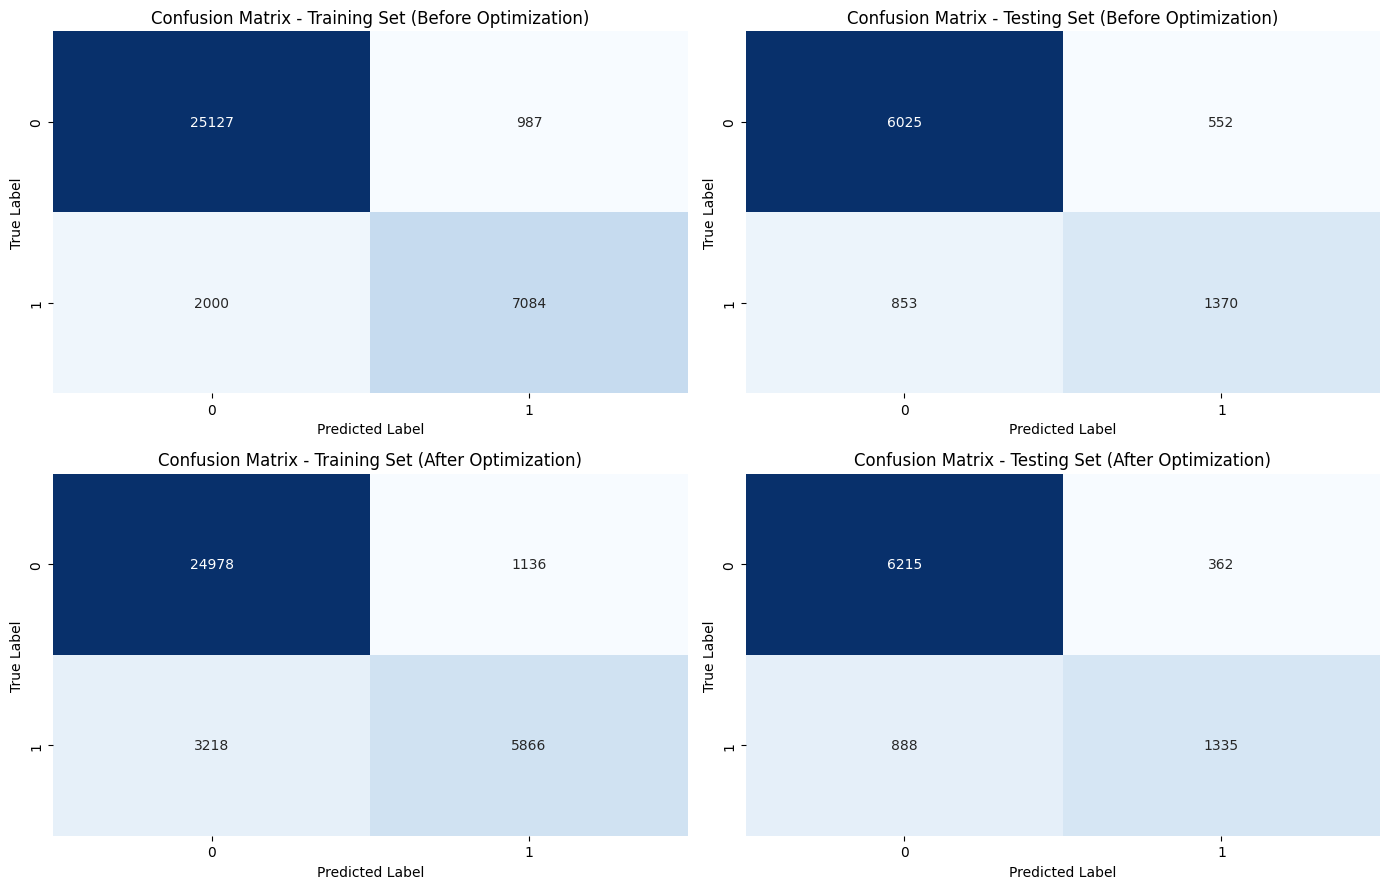

In [26]:
# Confusion Matrix for training set before optimization
train_conf_matrix_before = confusion_matrix(y_train, y_train_pred)

# Confusion Matrix for testing set before optimization
test_conf_matrix_before = confusion_matrix(y_test, y_test_pred)

# Confusion Matrix for training set after optimization
train_conf_matrix_after = confusion_matrix(y_train, y_pred_train_tuned)

# Confusion Matrix for testing set after optimization
test_conf_matrix_after = confusion_matrix(y_test, y_pred_test_tuned)

# Plotting confusion matrices side by side
plt.figure(figsize=(14, 9))

# Subplot 1: Confusion matrix before optimization for training set
plt.subplot(2, 2, 1)
sns.heatmap(train_conf_matrix_before, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - Training Set (Before Optimization)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

# Subplot 2: Confusion matrix before optimization for testing set
plt.subplot(2, 2, 2)
sns.heatmap(test_conf_matrix_before, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - Testing Set (Before Optimization)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

# Subplot 3: Confusion matrix after optimization for training set
plt.subplot(2, 2, 3)
sns.heatmap(train_conf_matrix_after, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - Training Set (After Optimization)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

# Subplot 4: Confusion matrix after optimization for testing set
plt.subplot(2, 2, 4)
sns.heatmap(test_conf_matrix_after, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - Testing Set (After Optimization)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

plt.tight_layout()
plt.show()


#### Precision and Recall Score Comparison

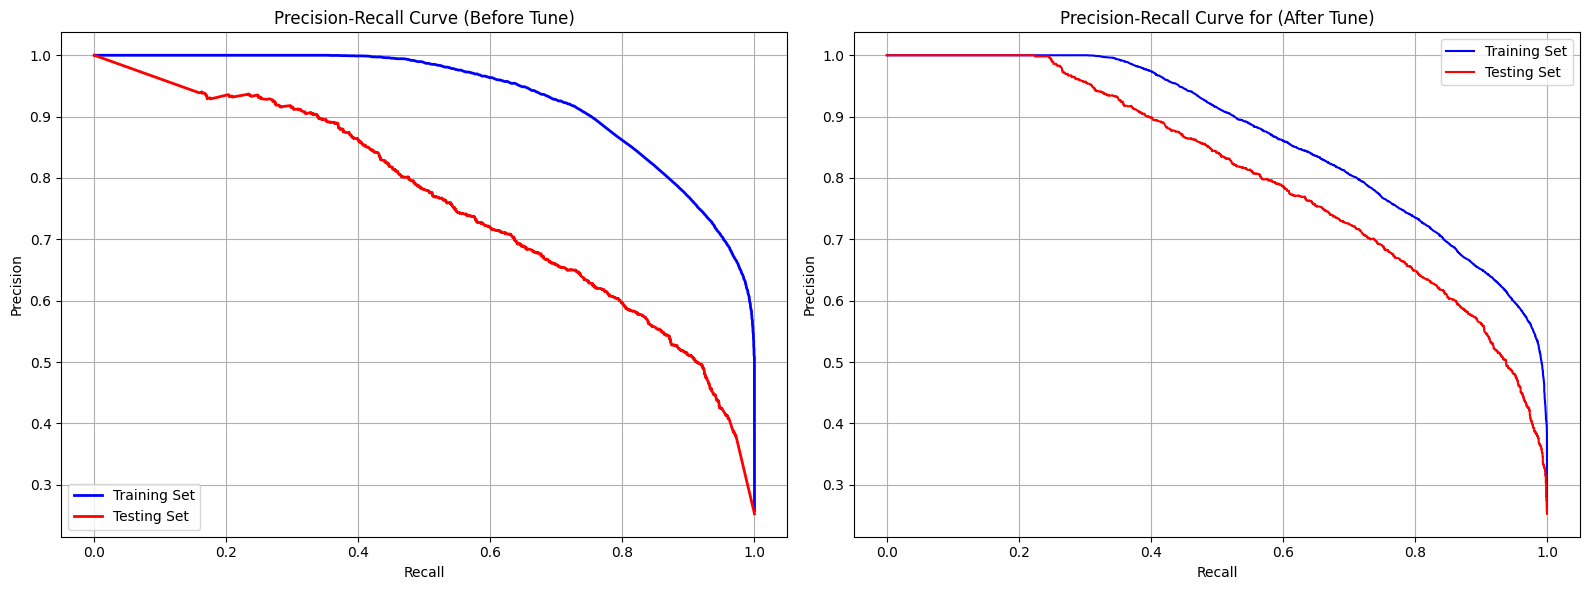

In [28]:
# Plotting precision-recall curves side by side
plt.figure(figsize=(16, 6))

# Subplot 1: Precision-recall curve for both training and testing sets
plt.subplot(1, 2, 1)
plt.plot(recall_train, precision_train, color='b', lw=2, label='Training Set')
plt.plot(recall_test, precision_test, color='r', lw=2, label='Testing Set')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (Before Tune)')
plt.legend(loc='lower left')
plt.grid(True)

# Subplot 2: Precision-recall curve for tuned model
plt.subplot(1, 2, 2)
plt.plot(train_recall, train_precision, label='Training Set', color='b')
plt.plot(test_recall, test_precision, label='Testing Set', color='r')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for (After Tune)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

#### Learning Curve Comparison

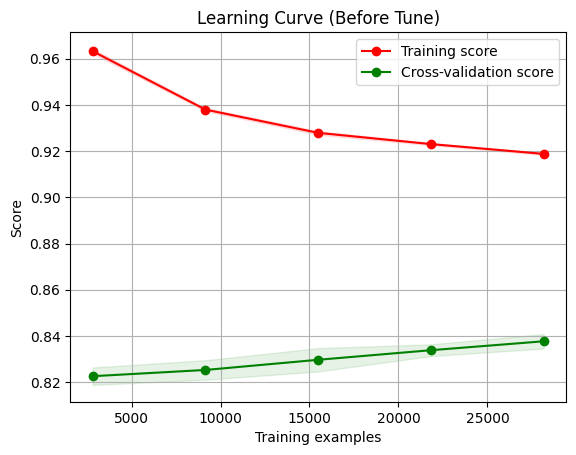

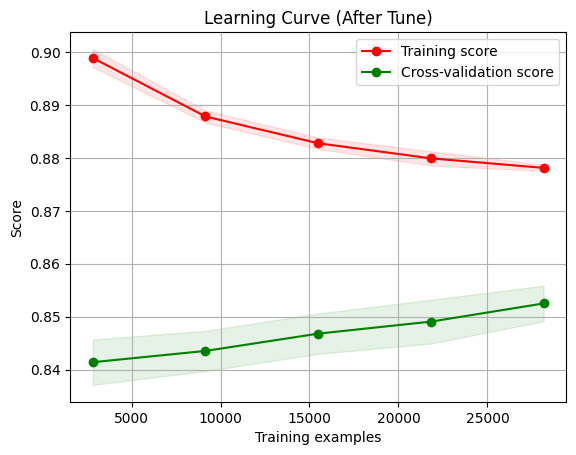

In [41]:
# Subplot 1: Learning curve for Random Forest Model
title = "Learning Curve (Before Tune)"
plot_learning_curve(rf_classifier, title, X_train, y_train, cv=5, n_jobs=-1)
plt.title(title)
plt.show()

# Subplot 2: Learning curve for Tuned Model
title = "Learning Curve (After Tune)"
plot_learning_curve(best_estimator, title, X_train, y_train, cv=5, n_jobs=-1)
plt.title(title)
plt.show()

#### ROC Curve and AUC Score Comparison

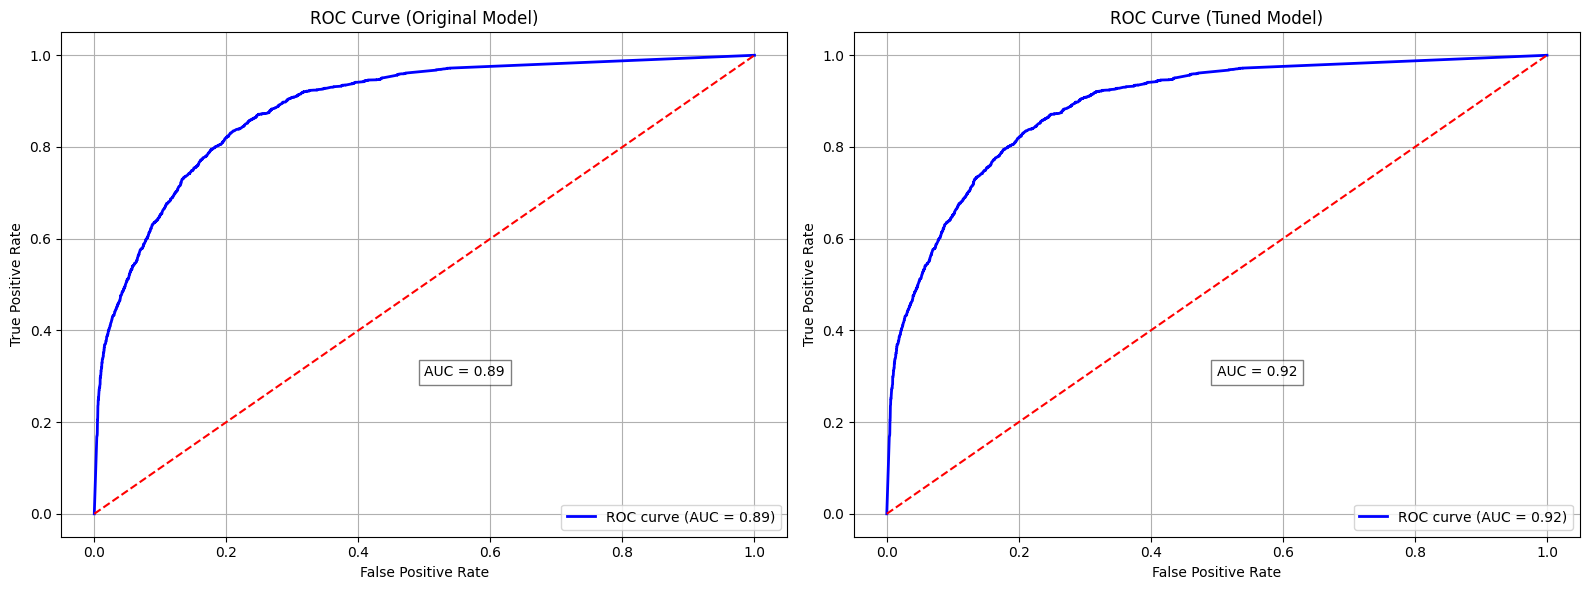

In [44]:
# Plotting ROC curves side by side
plt.figure(figsize=(16, 6))

# Subplot 1: ROC curve for original model
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='b', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], color='r', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Before Tune)')
plt.text(0.5, 0.3, "AUC = {:.2f}".format(auc_score), bbox=dict(facecolor='white', alpha=0.5))
plt.legend(loc='lower right')
plt.grid(True)

# Subplot 2: ROC curve for tuned model
plt.subplot(1, 2, 2)
plt.plot(fpr, tpr, color='b', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='r', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (After Tune)')
plt.text(0.5, 0.3, "AUC = {:.2f}".format(roc_auc), bbox=dict(facecolor='white', alpha=0.5))
plt.legend(loc='lower right')
plt.grid(True)

plt.tight_layout()
plt.show()
